In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow.keras.layers as tfl
from matplotlib.pyplot import imshow, show
import numpy as np
from cv2 import imread, imwrite, resize
import matplotlib.pyplot as plt
from os.path import join
from os import listdir

In [ ]:
def list_img_from_folder(folder_path):
  '''
  fild_path - path to folder containing images
  *******************************************
  return - a list of images
  '''

  images = []
  for file_name in listdir(folder_path):
    loaded_img = imread(join(folder_path, file_name))
    images.append(loaded_img)
  return images

In [ ]:
def data_augmentor(input, num_out = 1,
                   save = False, image_name = None, save_format = 'jpg',
                   save_folder = None, output_shape = 224, img_count = 0):
  '''
  input - imput a image of shape (w, h, c)
  num_out - number of ouput images according to each image in input
  save - Save image to save_folder if True
  image_name - name for the saved image
  save_format - decide format to save image
  save_folder - decide location to save image
  output_shape - shape of the output images
  *******************************************
  return - a tensor of augmented images of shape (num_out, output_shape, output_shape, c)
  '''
  augmentation_pipeline = Sequential(
    [
        tfl.RandomFlip('horizontal_and_vertical'),
        tfl.RandomRotation(0.5, fill_mode = 'wrap'),
        tfl.RandomZoom(0.2, fill_mode = 'reflect'),
        tfl.Resizing(288,288),
        tfl.CenterCrop(output_shape, output_shape),
        tfl.RandomContrast(0.2)
    ])
  (_,_,c) = input.shape
  output = np.zeros((num_out, output_shape, output_shape, c))
  img_count = img_count

  for i in range(num_out):
    augmented_image = augmentation_pipeline(input)
    output[i] = augmented_image

    if save and image_name and save_folder:
      augmented_image = augmented_image.numpy().astype('uint8')
      saved_name = f'{image_name}_{str(img_count).zfill(5)}.{save_format}'
      imwrite(join(save_folder, saved_name), augmented_image)
      img_count += 1

    elif save and (not image_name or not save_folder):
      raise ValueError('Please provide image_name and save_folder')

  return output

In [ ]:
def data_augmentor_tensor(input, num_out = 1,
                   save = False, image_name = None, save_format = 'jpg',
                   save_folder = None, output_shape = 224):
  '''
  input - imput array of images of shape (num, w, h , c)
  num_out - number of ouput images according to each image in input
  save - Save image to save_folder if True
  image_name - name for the saved image
  save_format - decide format to save image
  save_folder - decide location to save image
  output_shape - shape of the output images
  *******************************************
  return - a tensor of augmented images of shape (num, num_out, output_shape, output_shape, c)
  '''
  (num, w, h, c) = input.shape
  output = np.zeros((num, num_out, output_shape, output_shape, c))
  img_count = 0
  for i, image in enumerate(input):
    output[i] = data_augmentor(
        input = image, num_out = num_out,
        save = save, image_name = image_name,
        save_format = save_format, save_folder = save_folder,
        output_shape = output_shape, img_count = img_count
        )
    img_count += num_out
  return output

In [ ]:
def data_augmentor_list(input, num_out = 1,
                   save = False, image_name = None, save_format = 'jpg',
                   save_folder = None, output_shape = 224):
  '''
  input - imput a list of images, or tensor of images of shape (num, w, h , c)
  num_out - number of ouput images according to each image in input
  save - Save image to save_folder if True
  image_name - name for the saved image
  save_format - decide format to save image
  save_folder - decide location to save image
  output_shape - shape of the output images
  *******************************************
  return - a tensor of augmented images of shape (num, num_out, output_shape, output_shape, c)
  '''
  num = len(input)
  (_, _, c) = input[0].shape
  output = np.zeros((num, num_out, output_shape, output_shape, c))
  img_count = 0
  for i, image in enumerate(input):

    output[i] = data_augmentor(
        input = image, num_out = num_out,
        save = save, image_name = image_name,
        save_format = save_format, save_folder = save_folder,
        output_shape = output_shape, img_count = img_count
        )
    img_count += num_out


  return output

(2, 9, 224, 224, 3)


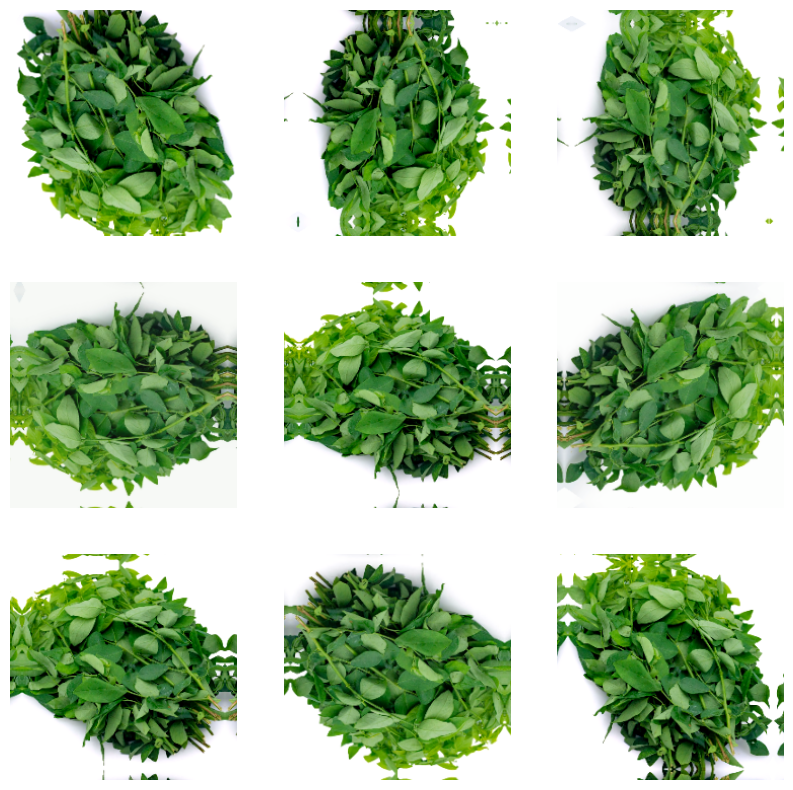

In [ ]:
# testing function

path = '/content/drive/MyDrive/DAP391m_G06_AI1807/Code/temp'
name = 'katuk'
tensor = np.zeros((2, 1000, 1000, 3))
tensor[0]= data
input = tensor
augmented_images = data_augmentor_tensor(
    input = input, num_out=9, save = True,
    image_name = name, save_folder = path
    )
print(augmented_images.shape)
plt.figure(figsize=(10, 10))
for i,image in enumerate(augmented_images[0]):
    ax = plt.subplot(3, 3, i + 1)
    imshow(image[:,:,::-1] / 255.)
    plt.axis('off')

In [ ]:
list_img = list_img_from_folder('/content/drive/MyDrive/DAP391m_G06_AI1807/Code/Data/test/rau ngot')
save_path = path = '/content/drive/MyDrive/DAP391m_G06_AI1807/Code/temp'
name = 'katuk'
augumented_imgs = data_augmentor_list(
    input = list_img, num_out=9, save = True,
    image_name = name, save_folder = path
    )

In [ ]:
len(list_img)

5